In [1]:
import matplotlib.pyplot as plt
from decimal import Decimal

In [37]:
fpaths = "./teste1"

lens = [3200, 4000, 4800]
sizes = ["small", "medium", "large"]
threads = [2, 4, 8, 16]
speedups_greff = []
sequenciais = []
paralelos = []

sequencial_local = []
for i in sizes:
    arquivo = open(f"{fpaths}/log_{i}_seq.txt", "r")
    tudo = arquivo.read()
    aux = tudo.split("media")
    aux = aux[1].split(": ")
    aux = aux[1].split(" desvio")
    sequencial_local.append(float(aux[0]))  
sequenciais.append(sequencial_local)

for i in sizes:
    paralelo_local = []
    for j in threads:
        arquivo = open(f"{fpaths}/log_{i}_{j}.txt", "r")
        tudo = arquivo.read()
        aux = tudo.split("media")
        aux = aux[1].split(": ")
        aux = aux[1].split(" desvio")
        paralelo_local.append(float(aux[0])) 
    paralelos.append(paralelo_local)

In [47]:
sequenciais

[[208.22249666666667, 408.5330216666667, 701.190052]]

In [45]:
paralelos

[[110.4480065, 61.8019845, 65.18187566666667, 61.9413755],
 [215.679069, 121.796277, 127.50251833333333, 121.46927683333334],
 [373.21319716666665, 212.00192366666667, 219.230981, 209.94357183333332]]

In [51]:
speedups_greff = []

speedup_local = [sequenciais[0][0] / x for x in paralelos[0]] # calculo speedup de 1000 x 1000 joao
speedups_greff.append(speedup_local)
speedup_local = [sequenciais[0][1] / x for x in paralelos[1]] # calculo speedup de 2000 x 2000 joao
speedups_greff.append(speedup_local)
speedup_local = [sequenciais[0][2] / x for x in paralelos[2]] # calculo speedup de 4000 x 4000 joao
speedups_greff.append(speedup_local)

# speedup_local = [sequenciais[1][0] / x for x in paralelos[3]] # calculo speedup de 1000 x 1000 greff
# speedups_greff.append(speedup_local)
# speedup_local = [sequenciais[1][1] / x for x in paralelos[4]] # calculo speedup de 2000 x 2000 greff
# speedups_greff.append(speedup_local)
# speedup_local = [sequenciais[1][2] / x for x in paralelos[5]] # calculo speedup de 4000 x 4000 greff
# speedups_greff.append(speedup_local)

# speedup_local = [sequenciais[2][0] / x for x in paralelos[6]] # calculo speedup de 1000 x 1000 gabriel
# speedups_greff.append(speedup_local)
# speedup_local = [sequenciais[2][1] / x for x in paralelos[7]] # calculo speedup de 2000 x 2000 gabriel
# speedups_greff.append(speedup_local)
# speedup_local = [sequenciais[2][2] / x for x in paralelos[8]] # calculo speedup de 4000 x 4000 gabriel
# speedups_greff.append(speedup_local)


print()
for i in speedups_greff:
    print(i)


[1.8852535529164727, 3.369187872384044, 3.194484579294632, 3.3616059537887835]
[1.8941709251659775, 3.3542324258948133, 3.2041172755398257, 3.3632621541594454]
[1.8787922220415696, 3.307470233630946, 3.1984076739591836, 3.3398976966851346]


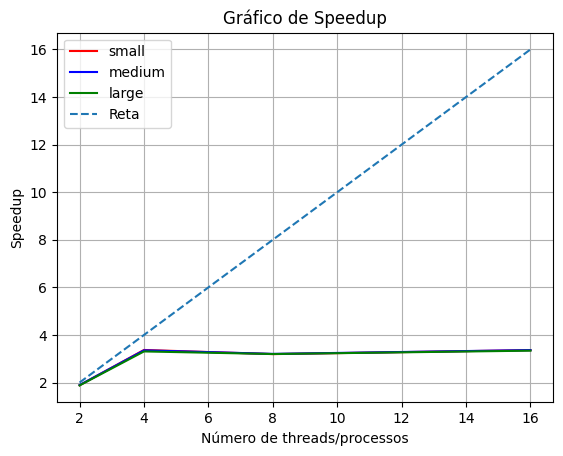

In [60]:
plt.plot(threads, speedups_greff[0], label='small', color='red' )
plt.plot(threads, speedups_greff[1], label='medium', color='blue')
plt.plot(threads, speedups_greff[2], label='large', color='green')
plt.plot(threads, threads, linestyle='--', label='Reta')
plt.xlabel('Número de threads/processos')
plt.ylabel('Speedup')
plt.title('Gráfico de Speedup')
plt.grid(True)
plt.legend()
plt.show()